In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [16]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [17]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

In [18]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('stopwords',download_dir = '../static/model')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building Vacabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [31]:
len(vocab)

15949

In [32]:
data.shape

(7920, 3)

In [33]:
tokens = [key for key in vocab if vocab[key] > 10]

In [34]:
len(tokens)

1145

In [35]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w',encoding = "utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide dataset

In [36]:
x = data['tweet']
y = data['label']

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [39]:
x_train.shape

(6336,)

In [40]:
x_test.shape

(1584,)

In [41]:
x_train

3480    xioti achi sunget samsung live laugh life filc...
3743    start busi day magic fairydalia dalialan fairy...
3129    oohh yeah time ps assassinscre game awesom des...
6405                            itun blow never ever kind
3711    special app valentin … photographi rt daughter...
                              ...                        
6023    itali goooooo tweegram instagood iphonesia pho...
740     hello babi come papa newphon samsung note guer...
7248    mihihi happi xd thx teddybjornen samsung galax...
1570                    kaptainkirki need smart phone bad
1257    new iphon case guerlain new iphon case iphon p...
Name: tweet, Length: 6336, dtype: object

# Vectorization

In [42]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)
    
    return vectorized_lst_new

In [43]:
vectorized_x_train = vectorizer(x_train,tokens)

In [44]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
vectorized_x_test = vectorizer(x_train,tokens)

In [46]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
y_train

3480    0
3743    0
3129    0
6405    1
3711    0
       ..
6023    0
740     0
7248    0
1570    0
1257    0
Name: label, Length: 6336, dtype: int64

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_test

6373    0
7843    0
1412    0
102     0
5741    0
       ..
4398    1
3649    0
1021    0
4383    0
241     1
Name: label, Length: 1584, dtype: int64

In [50]:
y_train.value_counts()

label
0    4704
1    1632
Name: count, dtype: int64

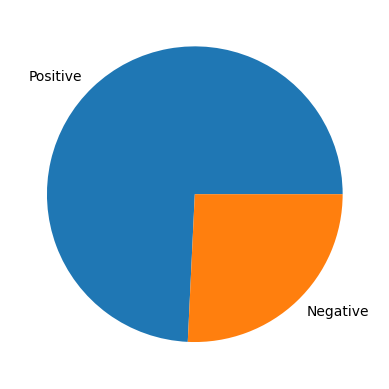

In [51]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),labels= ['Positive','Negative'])
plt.show()

### Handle imbalanced dataset

In [52]:
!pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9408, 1145) (9408,)


In [54]:
y_train_smote.value_counts()

label
0    4704
1    4704
Name: count, dtype: int64

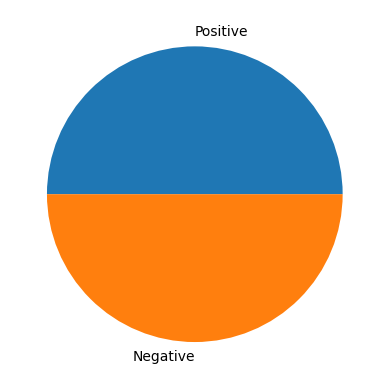

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),labels= ['Positive','Negative'])
plt.show()

In [56]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9403    1
9404    1
9405    1
9406    1
9407    1
Name: label, Length: 9408, dtype: int64

In [58]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
y_test

6373    0
7843    0
1412    0
102     0
5741    0
       ..
4398    1
3649    0
1021    0
4383    0
241     1
Name: label, Length: 1584, dtype: int64

## Model training andd Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)    
    rec = round(recall_score(y_act, y_pred),3)  
    f1 = round(f1_score(y_act, y_pred),3)   
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)    
    rec = round(recall_score(y_act, y_pred),3)  
    f1 = round(f1_score(y_act, y_pred),3)   
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [63]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [64]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [65]:
y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9403    1
9404    1
9405    1
9406    1
9407    1
Name: label, Length: 9408, dtype: int64

In [66]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.968
	F1-Score = 0.942


In [67]:
y_test_pred = lr.predict(vectorized_x_test)

In [68]:
y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
y_test

6373    0
7843    0
1412    0
102     0
5741    0
       ..
4398    1
3649    0
1021    0
4383    0
241     1
Name: label, Length: 1584, dtype: int64

In [71]:
validation_scores(y_test, y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

In [72]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.968
	F1-Score = 0.942


ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

## Naive Bayes

In [73]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.869
	Recall = 0.956
	F1-Score = 0.91


ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

## DecisionTree

In [74]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

## Random Forest

In [75]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

## Support Vector Machine

In [76]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.961
	Recall = 0.997
	F1-Score = 0.979


ValueError: Found input variables with inconsistent numbers of samples: [1584, 6336]

In [ ]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr,file)